In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
pd.set_option('display.max_rows', 20)

In [ ]:
def null_columns(df):
    
    null_columns = df.columns[df.isnull().any()]
    null_df = pd.DataFrame(df[null_columns].isnull().sum()).reset_index()
    null_df = null_df.rename(columns={'index':'Feature',0:'Count'})
    
    return null_df.sort_values('Count', ascending = False)

In [ ]:
def clean_df(df):
    
    # Cleaning out the rows that have more than 10% missing data
    perc = 10.0
    min_count =  int(((100-perc)/100)*df.shape[1] + 1)
    df_cleaned = df.dropna(axis=0, thresh = min_count)

    # Renaming zipcodes
    df_cleaned = df_cleaned.rename(columns = {'RegionName':'Zipcode'})

    # Ensuring zipcodes are 5 digits long
    df_cleaned['Zipcode'] = df_cleaned['Zipcode'].astype(str)
    df_cleaned['Zipcode'] = list(map(lambda x: '0'+ x if len(x) == 4 else x,df_cleaned['Zipcode']))

    # Dropping Unused Columns
    df_cleaned = df_cleaned.drop(columns = ['RegionID', 'City', 'State','Metro', 'CountyName','SizeRank'])

    # Swapping axes
    df_cleaned = df_cleaned.swapaxes('index','columns')

    # Changing column names and removing column name row
    df_cleaned.columns = df_cleaned.iloc[0]
    df_cleaned = df_cleaned.iloc[1:,:]

    # Changing index type and frequency
    df_cleaned.index = pd.to_datetime(df_cleaned.index)
    df_cleaned = df_cleaned.asfreq('MS')

    # Imputing mean into NaNs and filling
    df_cleaned = (df_cleaned.ffill() + df_cleaned.bfill())/2
    df_cleaned = df_cleaned.bfill().ffill()

    # Sorting the columns
    df_cleaned = df_cleaned.reindex(sorted(df_cleaned.columns), axis=1)
    
    return df_cleaned

In [4]:
all_zip = pd.read_csv('data/Zip_Zri_AllHomesPlusMultifamily.csv')
all_zip = all_zip.dropna(subset=['Metro'])

In [5]:
all_zip.head(2)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
0,61639,10025,New York,NY,New York-Newark-Jersey City,New York County,1,3031.0,3058.0,3031.0,3015.0,2976.0,2914.0,2860.0,2811.0,2792.0,2799.0,2820.0,2852.0,2885.0,2905.0,2883.0,2879.0,2905.0,2916.0,2908.0,2915.0,2920.0,2920.0,2938.0,2999.0,3029.0,3022.0,3049.0,3083.0,3086.0,3072.0,3081.0,3095.0,3147.0,3190.0,3188.0,3149.0,3149.0,3174.0,3175.0,3230.0,3267.0,3285.0,3234.0,3296.0,3357.0,3366.0,NaN,3186.0,3204.0,NaN,NaN,NaN,3682.0,3767.0,3767.0,3811.0,3793.0,3894.0,3919.0,NaN,NaN,NaN,NaN,4166.0,4164.0,4133.0,4015.0,3943.0,3945.0,4051.0,NaN,NaN,NaN,NaN,4916.0,NaN,5009.0,NaN,NaN,NaN,NaN,3988.0,NaN,NaN,3661.0,NaN,NaN,NaN,NaN,3512.0,3552.0,NaN,3768.0,3731.0,3634.0,NaN,NaN,3300.0,3227.0,NaN,NaN,NaN,NaN,3785.0,3788.0,3786.0,3784.0,3766.0,3779.0,3843.0,3873.0,3835.0,NaN
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,1790.0,1787.0,1784.0,1774.0,1755.0,1742.0,1735.0,1741.0,1742.0,1757.0,1790.0,1817.0,1839.0,1841.0,1844.0,1844.0,1820.0,1818.0,1829.0,1843.0,1860.0,1878.0,1898.0,1889.0,1890.0,1894.0,1897.0,1886.0,1884.0,1887.0,1907.0,1918.0,1925.0,1948.0,1996.0,2017.0,2011.0,2002.0,1989.0,1984.0,1979.0,1976.0,1969.0,1989.0,1996.0,2001.0,2006.0,2009.0,2032.0,2045.0,2038.0,2028.0,2016.0,2028.0,2033.0,2027.0,2041.0,2071.0,2100.0,2136.0,2139.0,2119.0,2093.0,2079.0,2061.0,2058.0,2079.0,2100.0,2115.0,2150.0,2184.0,2201.0,2212.0,2207.0,2182.0,2136.0,2108.0,2104.0,2117.0,2118.0,2125.0,2146.0,2168.0,2183.0,2165.0,2128.0,2097.0,2070.0,2057.0,2052.0,2054.0,2061.0,2074.0,2106.0,2134.0,2146.0,2155.0,2149.0,2116.0,2076.0,2025.0,2014.0,2017.0,2039.0,2070.0,2105.0,2140.0,2168.0,2185.0,2125.0,NaN,2053.0,1996.0


In [24]:
cali_metros = all_zip[all_zip['State'] == 'CA']
cali_metros['Metro'].value_counts()

Los Angeles-Long Beach-Anaheim         342
San Francisco-Oakland-Hayward          139
Riverside-San Bernardino-Ontario       119
Sacramento--Roseville--Arden-Arcade     84
San Diego-Carlsbad                      80
                                      ... 
Napa                                     5
Hanford-Corcoran                         5
Yuba City                                5
Eureka-Arcata-Fortuna                    5
Red Bluff                                4
Name: Metro, Length: 30, dtype: int64

In [27]:
cali_top5 = ['Los Angeles-Long Beach-Anaheim', 'San Francisco-Oakland-Hayward','Riverside-San Bernardino-Ontario',\
'Sacramento--Roseville--Arden-Arcade', 'San Diego-Carlsbad']

In [33]:
cali_top5_df = cali_metros[cali_metros['Metro'].isin(cali_top5)]
cali_top5_df.shape

(764, 120)

In [36]:
cali_top5_cleaned = clean_df(cali_top5_df)
cali_top5_cleaned

Zipcode,90001,90002,90003,90004,90005,90006,90007,90008,90011,90012,90013,90015,90016,90017,90018,90019,90020,90022,90023,90024,90025,90026,90027,90028,90029,90031,90032,90033,90034,90035,90036,90037,90038,90039,90040,90041,90042,90043,90044,90045,90046,90047,90048,90049,90056,90057,90059,90061,90062,90063,90064,90065,90066,90067,90068,90069,90077,90201,90210,90211,90212,90220,90221,90222,90230,90232,90240,90241,90242,90245,90247,90248,90249,90250,90254,90255,90260,90262,90265,90266,90270,90272,90275,90277,90278,90280,90290,90291,90292,90293,90301,90302,90303,90304,90305,90402,90403,90404,90405,90501,90502,90503,90504,90505,90601,90602,90603,90604,90605,90606,90620,90621,90623,90630,90631,90638,90640,90650,90660,90670,90680,90701,90703,90704,90706,90710,90712,90713,90715,90716,90717,90720,90723,90731,90732,90740,90744,90745,90746,90755,90802,90804,90805,90806,90807,90808,90810,90813,90814,90815,91001,91006,91007,91010,91011,91016,91020,91024,91030,91040,91042,91101,91103,91104,91105,91106,91107,91201,91202,91203,91204,91205,91206,91207,91208,91214,91301,91302,91304,91306,91307,91311,91316,91321,91324,91325,91326,91331,91335,91340,91342,91343,91344,91345,91350,91351,91352,91354,91355,91356,91364,91367,91381,91384,91387,91390,91401,91402,91403,91405,91406,91411,91423,91436,91501,91502,91504,91505,91506,91601,91602,91604,91606,91607,91701,91702,91706,91708,91709,91710,91711,91722,91723,91724,91730,91731,91732,91733,91737,91739,91740,91741,91744,91745,91746,91748,91750,91752,91754,91755,91761,91762,91763,91764,91765,91766,91767,91768,91770,91773,91775,91776,91780,91784,91786,91789,91790,91791,91792,91801,91803,91901,91902,91910,91911,91913,91914,91932,91941,91942,91945,91950,91977,92003,92004,92007,92008,92009,92010,92011,92014,92019,92020,92021,92024,92025,92026,92027,92028,92029,92036,92037,92040,92054,92056,92057,92058,92064,92065,92069,92071,92075,92078,92081,92082,92083,92084,92091,92101,92102,92103,92104,92105,92106,92107,92108,92109,92110,92111,92113,92114,92115,92116,92117,92118,92119,92120,92121,92122,92123,92124,92126,92127,92128,92129,92130,92131,92139,92154,92173,92201,92203,92211,92220,92223,92225,92234,92236,92240,92241,92252,92253,92254,92256,92260,92262,92264,92276,92277,92284,92285,92301,92307,92308,92311,92313,92314,92315,92316,92320,92324,92325,92333,92335,92336,92337,92341,92342,92344,92345,92346,92352,92354,92356,92359,92363,92371,92373,92374,92376,92377,92382,92391,92392,92394,92395,92399,92404,92405,92407,92408,92410,92411,92501,92503,92504,92505,92506,92507,92508,92509,92530,92532,92543,92544,92545,92549,92551,92553,92555,92557,92562,92563,92567,92570,92571,92582,92583,92584,92585,92586,92587,92591,92592,92595,92596,92602,92603,92604,92606,92610,92612,92614,92618,92620,92624,92625,92626,92627,92629,92630,92637,92646,92647,92648,92649,92651,92653,92655,92656,92657,92660,92663,92672,92673,92675,92677,92679,92683,92688,92691,92692,92701,92703,92704,92705,92706,92707,92708,92780,92782,92801,92802,92804,92805,92806,92807,92808,92821,92823,92831,92832,92833,92835,92840,92841,92843,92844,92845,92860,92865,92866,92867,92868,92869,92870,92879,92880,92881,92882,92883,92886,92887,93532,93534,93535,93536,93550,93551,93552,93591,94002,94005,94010,94014,94015,94019,94025,94030,94044,94061,94062,94063,94066,94070,94080,94102,94103,94105,94107,94108,94109,94110,94111,94112,94114,94115,94116,94117,94118,94121,94122,94123,94127,94131,94132,94133,94158,94401,94402,94403,94404,94501,94502,94505,94506,94507,94509,94513,94517,94518,94519,94520,94521,94523,94525,94526,94530,94531,94536,94538,94539,94541,94542,94544,94545,94546,94547,94549,94550,94551,94552,94553,94555,94556,94560,94561,94563,94564,94565,94566,94568,94572,94577,94578,94579,94580,94582,94583,94587,94588,94595,94596,94597,94598,94601,94602,94603,94605,94606,94607,94608,94610,94619,94621,94707,94801,94803,94804,94805,94806,94901,94903,94904,94920,94925,94930,94939,94941,94945,94947,94949,94960,94965,95602,95603,95605,95608,95610,95614,95616,95618,95619,95621,95623,95

AxesSubplot(0.125,0.125;0.775x0.755)


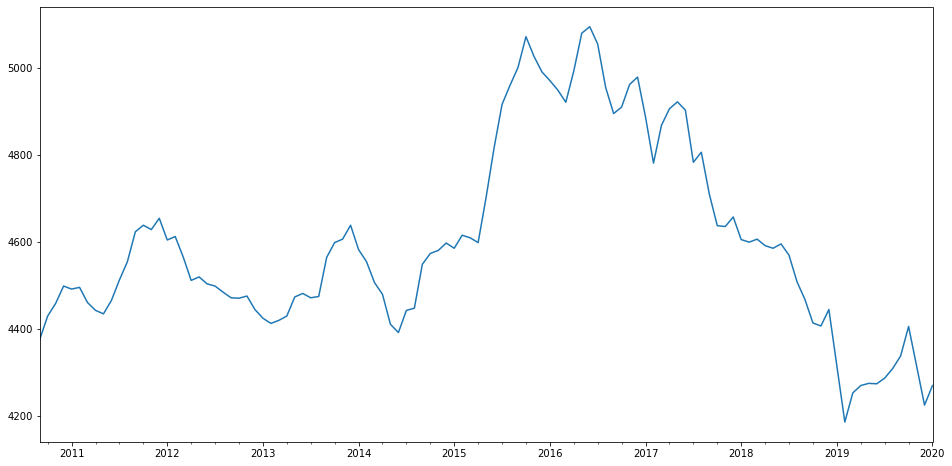

In [56]:
print(cali_top5_cleaned['90067'].plot(figsize=(16,8)))

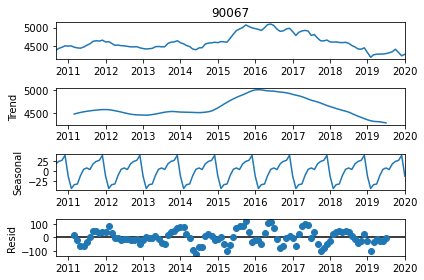

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(cali_top5_cleaned['90067'])
res.plot();